In [2]:
import pandas as pd
import store
from operator import itemgetter

## Zipf's Law

In [44]:
doc_field = 'reviewText'
r_info = store.load_field_cache(doc_field)
docs_tf = r_info['tf']
word_cnt = {}

for doc, terms in docs_tf.items():
    for (term,tf) in terms:
        if term not in word_cnt:
            word_cnt[term] = 0
        word_cnt[term] += tf

z_law_data = list(sorted(word_cnt.items(),key=itemgetter(1), reverse=True))
zlaw_x= []
zlaw_y = []
for index,pair in enumerate(z_law_data):
    zlaw_x.append(index)
    zlaw_y.append(pair[1])
z_law_data

[('the', 1160),
 ('to', 1149),
 ('gift', 1034),
 ('a', 933),
 ('and', 910),
 ('it', 908),
 ('i', 852),
 ('card', 756),
 ('for', 625),
 ('was', 542),
 ('this', 438),
 ('my', 416),
 ('of', 340),
 ('great', 324),
 ('love', 313),
 ('is', 281),
 ('on', 258),
 ('use', 257),
 ('you', 254),
 ('in', 251),
 ('they', 240),
 ('easi', 231),
 ('that', 227),
 ('amazon', 220),
 ('with', 214),
 ('not', 203),
 ('as', 187),
 ('so', 174),
 ('have', 171),
 ('veri', 161),
 ('get', 157),
 ('be', 145),
 ('work', 139),
 ('perfect', 135),
 ('give', 132),
 ('but', 131),
 ('she', 131),
 ('what', 130),
 ('way', 128),
 ('at', 127),
 ('purchas', 124),
 ('an', 123),
 ('time', 121),
 ('receiv', 117),
 ('can', 114),
 ('like', 112),
 ('no', 111),
 ('want', 106),
 ('are', 104),
 ('out', 102),
 ('had', 100),
 ('or', 99),
 ('buy', 99),
 ('would', 98),
 ('from', 96),
 ('when', 95),
 ('he', 95),
 ('good', 94),
 ('them', 93),
 ('her', 93),
 ('just', 92),
 ('send', 91),
 ('will', 91),
 ('recipi', 91),
 ('one', 90),
 ('got', 89

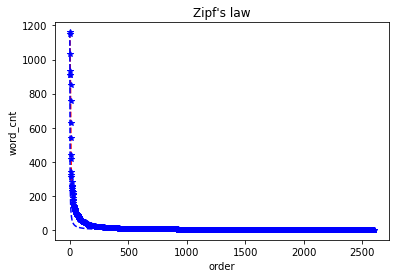

In [45]:
import matplotlib.pyplot as plt
import math
y_ = [zlaw_y[0]/(i+1 ) for i in range(zlaw_x[-1]+1)]
l11 = plt.plot(zlaw_x, zlaw_y, 'r--', label='type1')
l12 = plt.plot(zlaw_x, y_, 'b--', label='type3')
plt.plot(zlaw_x, zlaw_y, 'b*', label='type2')
plt.title("Zipf's law")
plt.xlabel('order')
plt.ylabel('word_cnt')
plt.show()

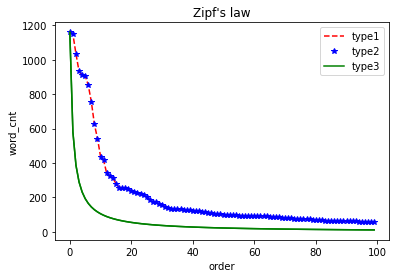

In [46]:
zlaw_x_limit = zlaw_x[:100]
zlaw_y_limit = zlaw_y[:100]
import math
x_ = np.arange(100)
y_ = [zlaw_y[0]/(i+1) for i in range(100)]

l21 = plt.plot(zlaw_x_limit, zlaw_y_limit, 'r--', label='type1')
plt.plot(zlaw_x_limit, zlaw_y_limit, 'b*', label='type2')
l22 = plt.plot(x_, y_, 'g-', label='type3')
plt.plot(x_, y_, 'g-')
plt.title("Zipf's law")
plt.xlabel('order')
plt.ylabel('word_cnt')
plt.legend()
plt.show()

## Heap's Law

In [13]:
doc_fields = ['title', 'feature', 'description', 'summary', 'reviewText']
h_law_data = {}

for field in doc_fields:
    total_cnt = 0
    unique_cnt = 0
    vocabulary = set()
    info = store.load_field_cache(field)
    docs_tf = info['tf']
    for doc,terms in docs_tf.items():
        for (term, tf) in terms:
            total_cnt += tf
            if term not in vocabulary:
                vocabulary.add(term)
                unique_cnt+=1
    h_law_data[field] = {'total_cnt': total_cnt, 'unique_cnt': unique_cnt}


In [47]:
h_law_data

{'title': {'total_cnt': 9695, 'unique_cnt': 1373},
 'feature': {'total_cnt': 30734, 'unique_cnt': 2791},
 'description': {'total_cnt': 58244, 'unique_cnt': 4291},
 'summary': {'total_cnt': 5497, 'unique_cnt': 858},
 'reviewText': {'total_cnt': 31550, 'unique_cnt': 2603}}

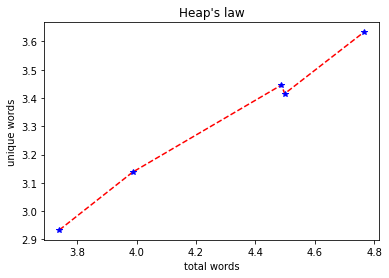

In [49]:
h_law_x = list(map(lambda x:math.log(x,10), [5497,9695,30734,31550,58244]))
h_law_y = list(map(lambda x:math.log(x,10), [858,1373,2791,2603,4291]))


l3 = plt.plot(h_law_x, h_law_y, 'r--', label='type1')
plt.plot(h_law_x, h_law_y, 'b*', label='type2')
plt.title("Heap's law")
plt.xlabel('total words')
plt.ylabel('unique words')
plt.show()